In [6]:
!pip install pandas numpy seaborn matplotlib scikit-learn nltk Pillow beautifulsoup4 selenium networkx wordcloud


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 356.7 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.7 MB 356.7 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.7 MB 356.7 kB/s eta 0:00:26
   --- ------------------------------------ 0.8/9.7 MB 381.3 kB/s eta 0:00:24
   --- ------------------------------------ 0.8/9.7 MB 381

In [4]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [5]:
phish_data = pd.read_csv('phishing_site_urls.csv',usecols=['URL','Label'],encoding='latin1')


In [6]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [7]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [8]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [9]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())
print(label_counts)

        count
Label        
good   392924
bad    156422


<Axes: xlabel='Label', ylabel='count'>

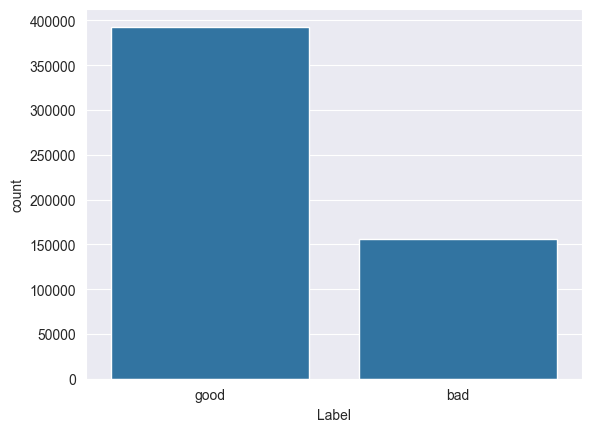

In [10]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(phish_data.Label.value_counts())

In [11]:
print(phish_data.columns)


Index(['URL', 'Label'], dtype='object')


In [12]:
tokenizer = RegexpTokenizer(r'[A-aa-z]+')
print(tokenizer)

RegexpTokenizer(pattern='[A-aa-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)


In [13]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [14]:
tokenizer.tokenize(phish_data.URL[0])


['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 '_profile',
 'ach',
 'outdated_page_tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login_access']

In [15]:
print('tokenizing words ...')
t0=time.perf_counter() #start time of a function
phish_data['text_tokenized']= phish_data.URL.map(lambda t: tokenizer.tokenize(t))
t1=time.perf_counter() - t0 
print("time for tokenizing : " , t1) 

tokenizing words ...
time for tokenizing :  2.2412389999999505


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized
435783,spoke.com/info/p6taCde/JessicaSirois,good,"[spoke, com, info, p, taCde, JessicaSirois]"
35389,orlovvideo.ru//wp-includes/js/index.htm,bad,"[orlovvideo, ru, wp, includes, js, index, htm]"
535559,welovekgc.com/bdb37,bad,"[welovekgc, com, bdb]"
547905,juanpedroperez.com/fotos/photos/xfs_extension.exe,bad,"[juanpedroperez, com, fotos, photos, xfs_exten..."
133366,sidharthagroup.com/includes/sign/sign-in/loadi...,bad,"[sidharthagroup, com, includes, sign, sign, in..."


In [17]:
stemmer = SnowballStemmer("english") # reduce words to their root form

In [18]:
print("starting stemming word")
t0=time.perf_counter()
phish_data["text_stemmed"] = phish_data["text_tokenized"].map(lambda l :[ stemmer.stem(word) for word in l])
t1 = time.perf_counter() - t0 
print("words stemmed in " , t1)

starting stemming word
words stemmed in  30.52621739999995


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
455417,united.com/,good,"[united, com]","[unit, com]"
167431,dukechronicle.com/article/sakai-pilot-gets-pos...,good,"[dukechronicle, com, article, sakai, pilot, ge...","[dukechronicl, com, articl, sakai, pilot, get,..."
22804,www.essei.cn/js/,bad,"[www, essei, cn, js]","[www, essei, cn, js]"
71931,www.portsight.com/Products.aspx?AliasPath=Prod...,good,"[www, portsight, com, Products, aspx, AliasPat...","[www, portsight, com, product, aspx, aliaspath..."
135600,eskihurdabilgisayar.com/wp-includes/Invoice/dr...,bad,"[eskihurdabilgisayar, com, wp, includes, Invoi...","[eskihurdabilgisayar, com, wp, includ, invoic,..."


In [20]:
print("getting joinningword")
t0=time.perf_counter()
phish_data['text_sent']=phish_data['text_stemmed'].map(lambda l : ' '.join(l))
t1=time.perf_counter() - t0
print("time taken" , t1)

getting joinningword
time taken 0.19541490000028716


In [22]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label=='good']

In [23]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [24]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweiraÂ¯&nvinipÂ¿ncHÂ¯wVÃ¶%ÃÃ¥yDaHÃ°Ã»/ÃyE...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-Ã³i...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r\...
18234,YÃ¬ÃªÂ koÃ£ÃÂ»ÃÂ§DÃ©ÃlÂ½Ã±Â¡Ã¢Ã¢qtÃ²Â¸/...,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [25]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

In [26]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

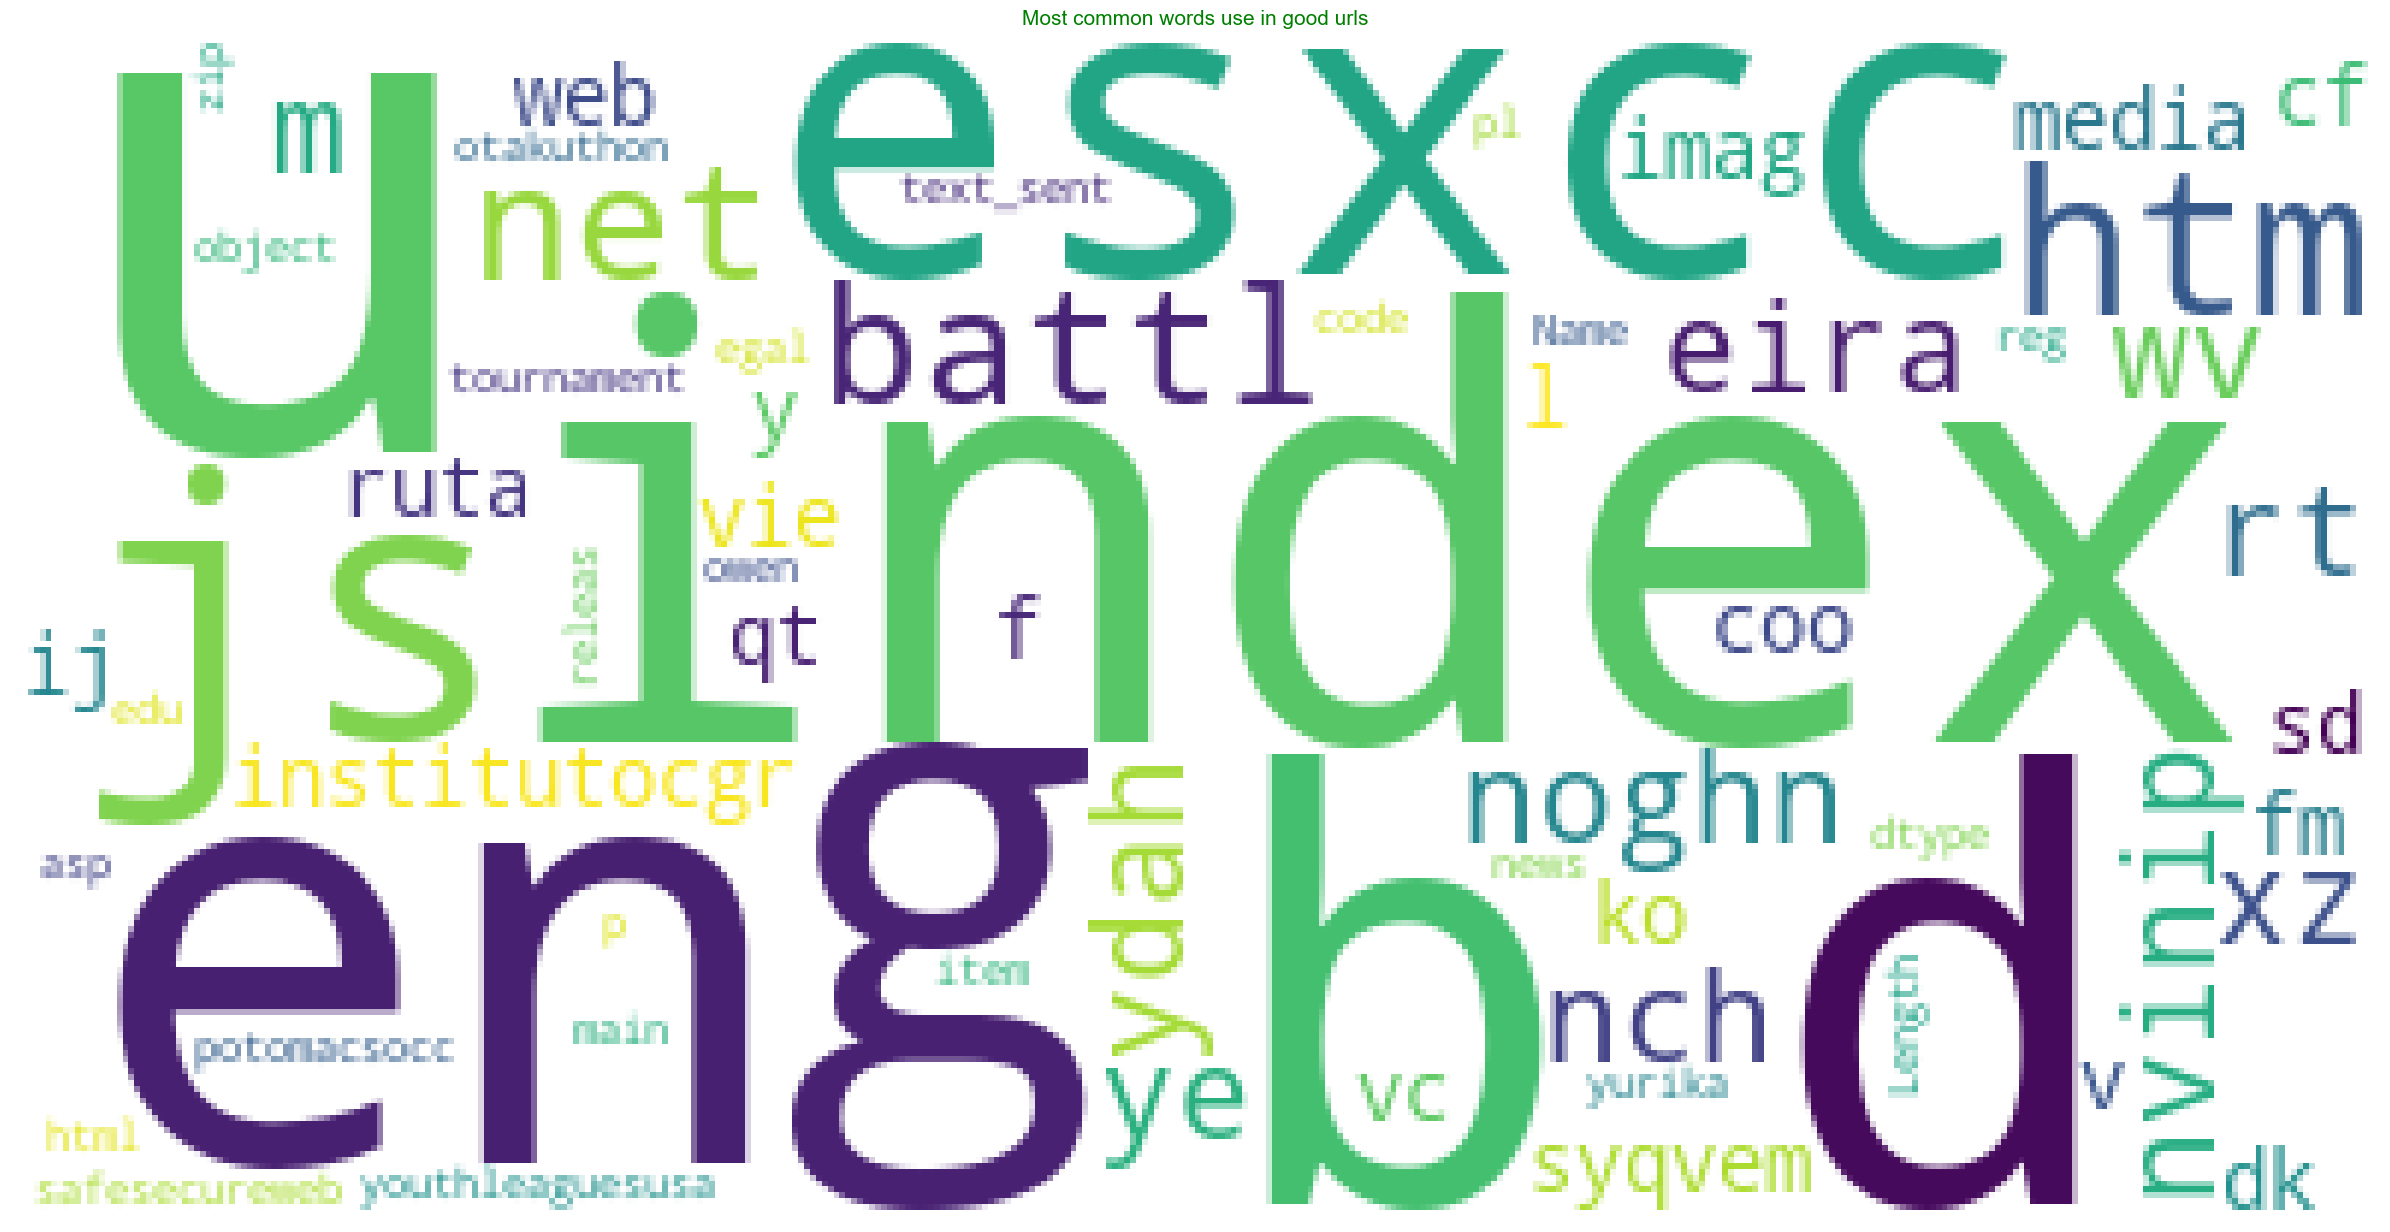

In [27]:
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [28]:
data=bad_sites.text_sent
data.reset_index(drop=True , inplace=True)

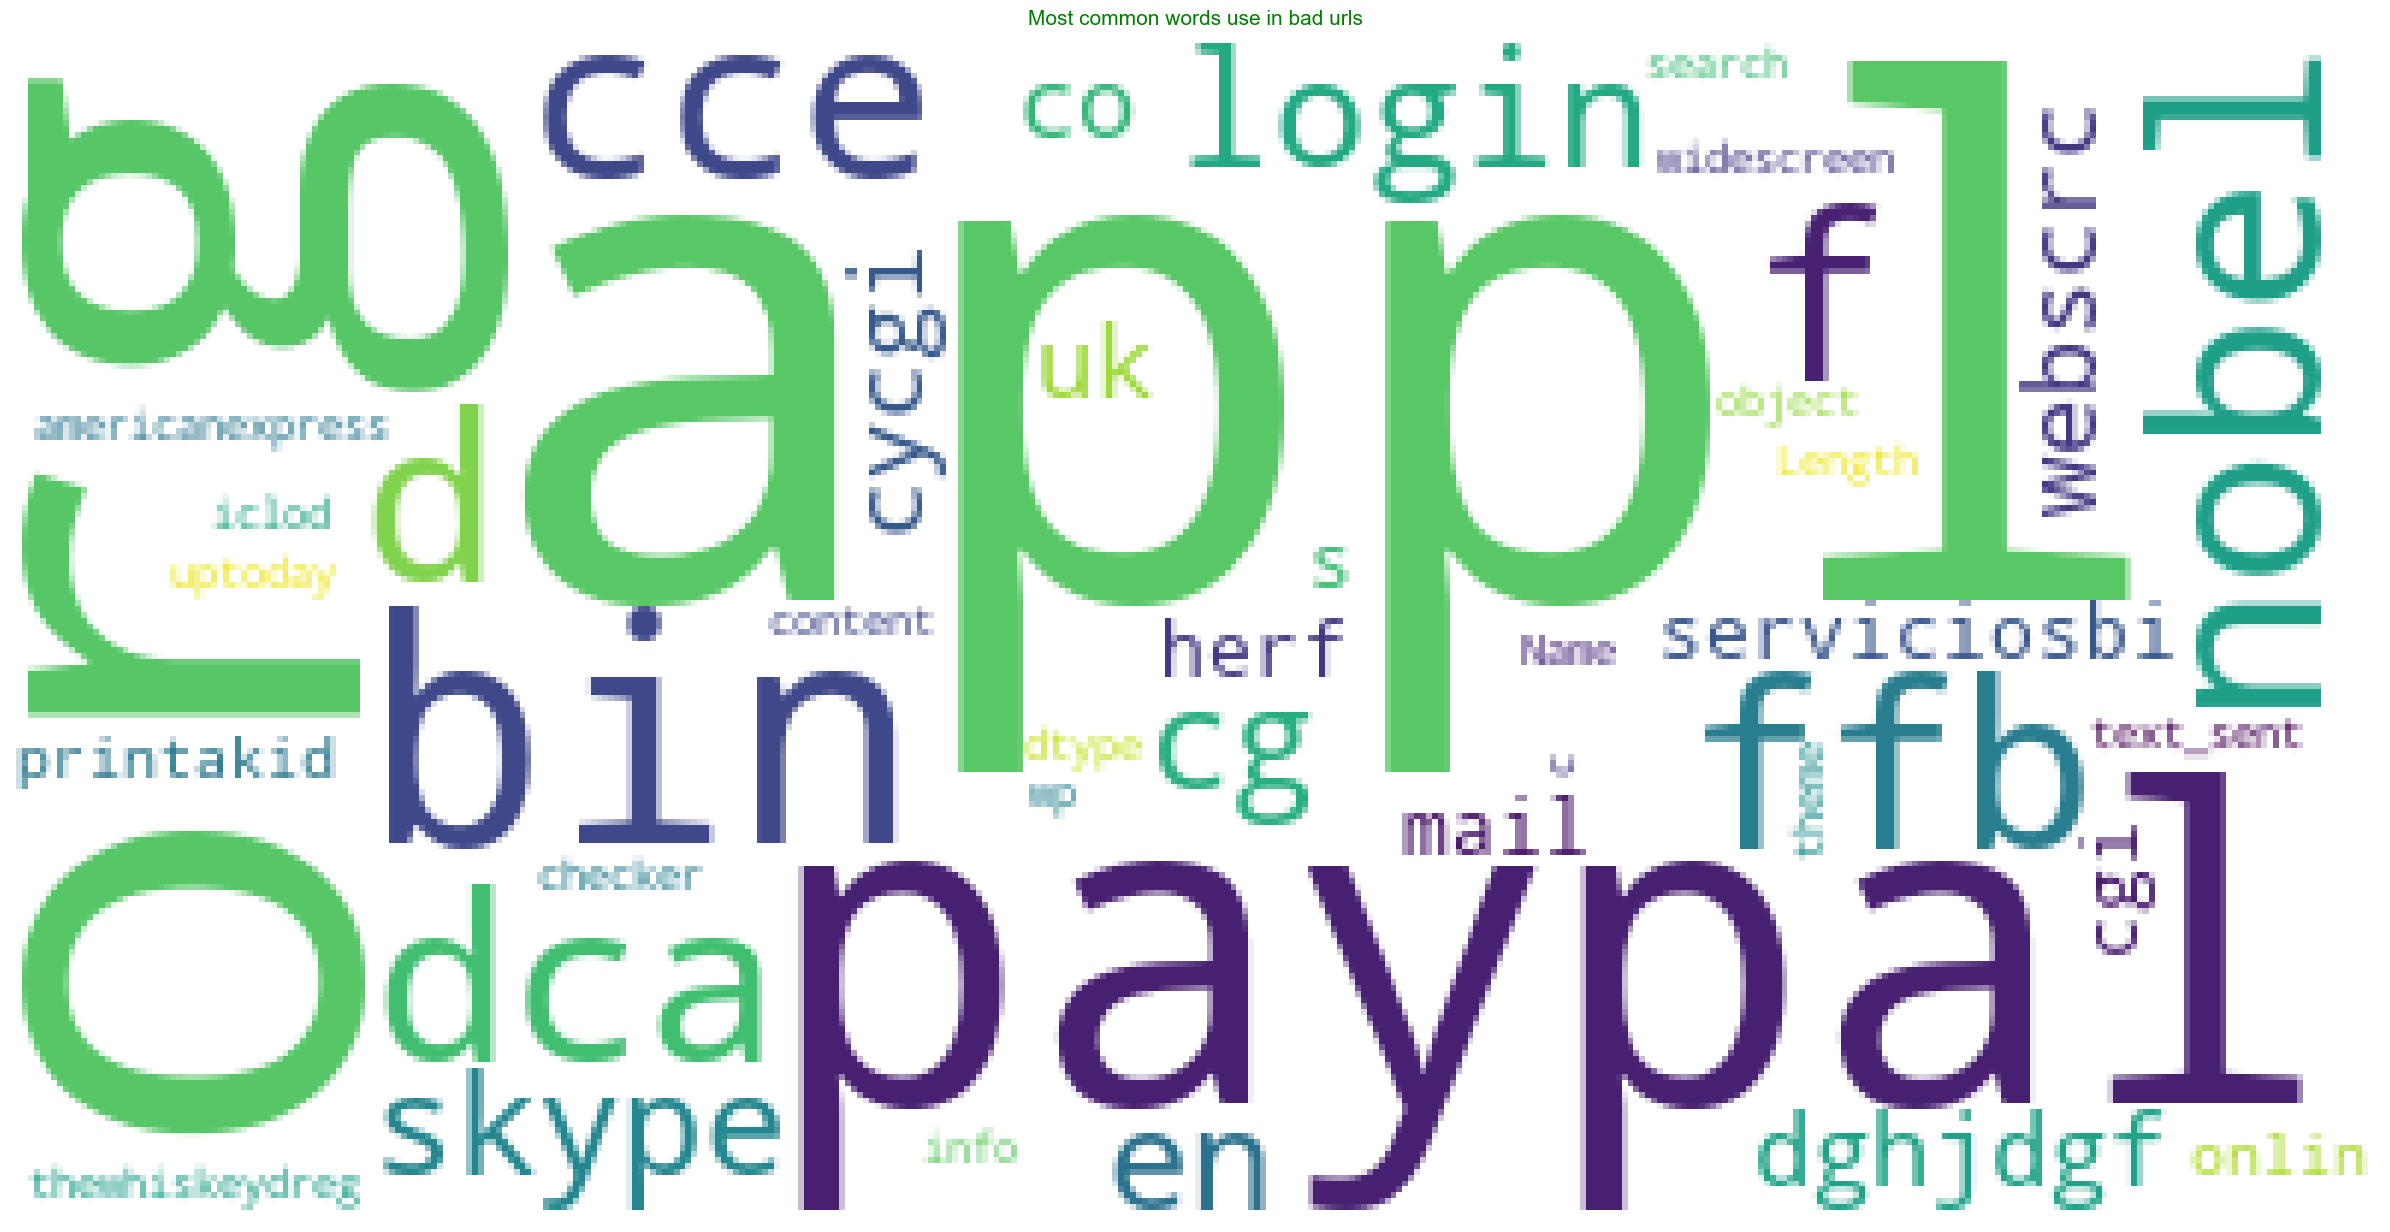

In [29]:
common_text=str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [30]:
!pip install chromedriver-binary

Defaulting to user installation because normal site-packages is not writeable


In [31]:
!pip install webdriver-manager


Defaulting to user installation because normal site-packages is not writeable


In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Set up Chrome options
chrome_options = Options()
# Uncomment the following line if you want to run in headless mode
# chrome_options.add_argument("--headless")

# Initialize the Chrome WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

list_urls = ['https://www.google.com/','https://www.facebook.com/about-us'] #here i take phishing sites 
links_with_text = []

for url in list_urls:
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    for line in soup.find_all('a'):
        href = line.get('href')
        if href:  # Ensure href is not None
            links_with_text.append([url, href])

# Close the browser
driver.quit()

# Print the collected links
for link in links_with_text:
    print(link)


['https://www.google.com/', 'https://mail.google.com/mail/&ogbl']
['https://www.google.com/', 'https://www.google.com/imghp?hl=en&ogbl']
['https://www.google.com/', 'https://www.google.tn/intl/en/about/products']
['https://www.google.com/', 'https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/&ec=GAZAmgQ']
['https://www.google.com/', 'https://www.google.com/setprefs?sig=0_O62SpxT5i13vW__4zayrGqeXaTk%3D&hl=ar&source=homepage&sa=X&ved=0ahUKEwjLw4X0-vyIAxXR4zQHHX_lH90Q2ZgBCBU']
['https://www.google.com/', 'https://www.google.com/setprefs?sig=0_O62SpxT5i13vW__4zayrGqeXaTk%3D&hl=fr&source=homepage&sa=X&ved=0ahUKEwjLw4X0-vyIAxXR4zQHHX_lH90Q2ZgBCBY']
['https://www.google.com/', 'https://about.google/?utm_source=google-TN&utm_medium=referral&utm_campaign=hp-footer&fg=1']
['https://www.google.com/', 'https://www.google.com/intl/en_tn/ads/?subid=ww-ww-et-g-awa-a-g_hpafoot1_1!o2&utm_source=google.com&utm_medium=referral&utm_campaign=google_hpafooter&fg=1']


In [33]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])


In [34]:
df.head()

,from,to
0,https://www.google.com/,https://mail.google.com/mail/&ogbl
1,https://www.google.com/,https://www.google.com/imghp?hl=en&ogbl
2,https://www.google.com/,https://www.google.tn/intl/en/about/products
3,https://www.google.com/,https://accounts.google.com/ServiceLogin?hl=en...
4,https://www.google.com/,https://www.google.com/setprefs?sig=0_O62SpxT5...


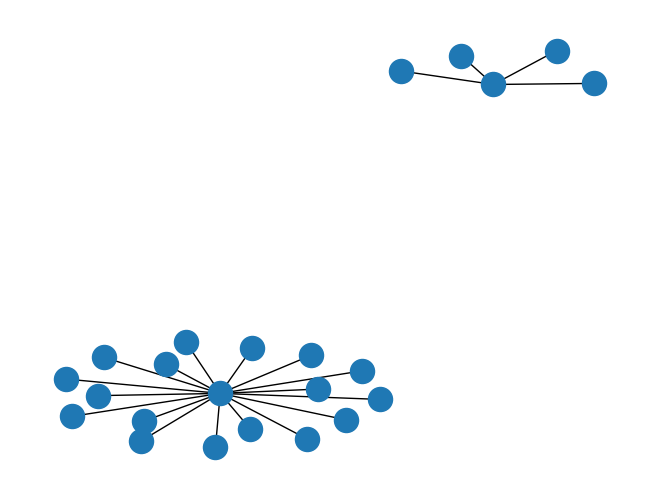

In [35]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

In [36]:
#create cv object 
cv=CountVectorizer()

In [38]:
feature=cv.fit_transform(phish_data.text_sent)

In [39]:
feature[:5].toarray() #convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
trainX , testX , trainY , testY = train_test_split(feature,phish_data.Label)

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(trainX , trainY)

LogisticRegression()

In [43]:
lr.score(testX,testY)

0.9634621405739168

In [44]:
Scores_ml ={}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training accuracy :  0.9779325208915339
Testing Accuracy: 0.9634621405739168

Classification report

              precision    recall  f1-score   support

    PHISHING       0.90      0.97      0.93     36467
        SAFE       0.99      0.96      0.97    100870

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

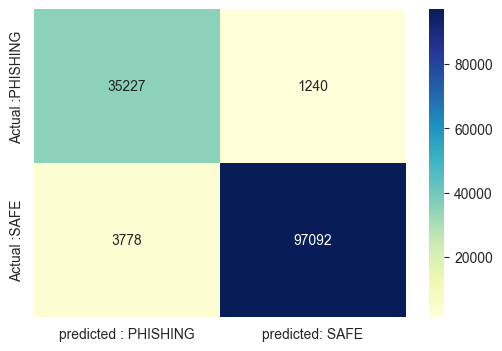

In [45]:
print("Training accuracy : ",lr.score(trainX ,trainY))
print('Testing Accuracy:',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX) ,testY) , columns= ['predicted : PHISHING' ,'predicted: SAFE'] , index=['Actual :PHISHING','Actual :SAFE'])
print('\nClassification report\n')
print(classification_report(lr.predict(testX), testY , target_names=["PHISHING" , "SAFE"]))
print("\nCONFUSION MATRIX")
plt.figure(figsize=(6,4))
sns.heatmap(con_mat , annot =True , fmt='d' , cmap="YlGnBu")

In [46]:
mnb = MultinomialNB()

In [47]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [48]:
mnb.score(testX , testY)

0.9579792772523064

In [49]:
Scores_ml['MultinomailNB']=np.round(mnb.score(testX,testY),2)

Training Accuracy :  0.973163207599834
Testing Accuracy : 0.9579792772523064

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    PHISHING       0.91      0.94      0.92     37900
        SAFE       0.98      0.97      0.97     99437

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

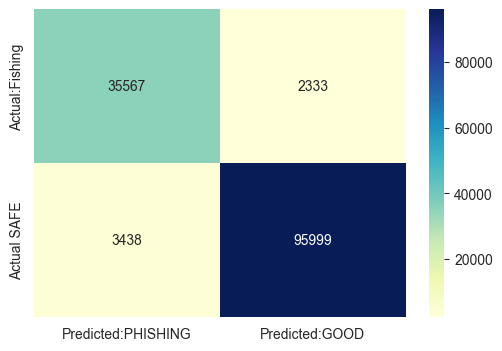

In [50]:
print("Training Accuracy : " , mnb.score(trainX,trainY))
print("Testing Accuracy :" , mnb.score(testX ,testY))
con_mat=pd.DataFrame(confusion_matrix(mnb.predict(testX),testY), columns=["Predicted:PHISHING" , "Predicted:GOOD"], index=["Actual:Fishing" , "Actual SAFE"])
print("\nCLASSIFICATION REPORT\n")
print(classification_report(mnb.predict(testX),testY,target_names = ["PHISHING" , "SAFE"]))
print("\nCONFUSION MATRIX")
plt.figure(figsize=(6,4))
sns.heatmap(con_mat , annot=True , fmt='d' ,cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

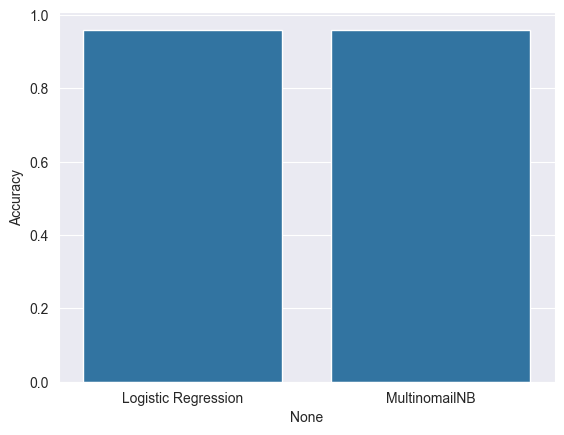

In [55]:
acc = pd.DataFrame.from_dict(Scores_ml,orient='index' , columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)


In [60]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [61]:
trainX ,testX , trainY , testY = train_test_split(phish_data.URL , phish_data.Label)

In [62]:
pipeline_ls.fit(trainX, trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [63]:
pipeline_ls.score(testX,testY)

0.9660979925293257

Training Accuracy:  0.9800659694327065
Testing Accuracy : 0.9660979925293257

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    PHISHING       0.91      0.97      0.94     36891
        SAFE       0.99      0.97      0.98    100446

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX`



<Axes: >

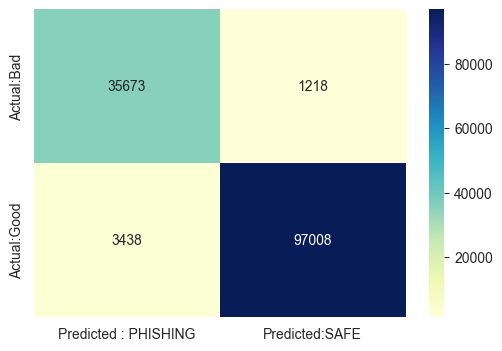

In [67]:
print('Training Accuracy: ',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :' ,pipeline_ls.score(testX,testY))
con_mat=pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX),testY),columns=['Predicted : PHISHING' , 'Predicted:SAFE'] , index=['Actual:Bad','Actual:Good'])
print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX),testY, target_names=['PHISHING','SAFE']))
print('\nCONFUSION MATRIX`\n')
plt.figure(figsize=(6,4))
sns.heatmap(con_mat ,annot=True,fmt='d',cmap="YlGnBu")

In [68]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))


In [69]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9660979925293257


* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [79]:
predict_bad = [	'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
label_mapping = {'bad': 'PHISHING', 'good': 'SAFE'}
result_bad_mapped = [label_mapping[label] for label in result]
result_good_mapped = [label_mapping[label] for label in result2]

# Print the results
print("Predictions for MALICIOUS-PHISHING URLs:")
print(result_bad_mapped)
print("*" * 30)
print("Predictions for SAFE URLs:")
print(result_good_mapped)

Predictions for MALICIOUS-PHISHING URLs:
['PHISHING']
******************************
Predictions for SAFE URLs:
['SAFE', 'SAFE', 'SAFE', 'SAFE']


In [76]:
!pip install flask

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
